In [2]:
#read in NORMALIZED data
import pandas as pd
df = pd.read_csv('team_attributes_processed-2009-2010.csv')
df2 = pd.read_csv('team_attributes_processed-2010-2011.csv')
df3 = pd.read_csv('team_attributes_processed-2011-2012.csv')
df4 = pd.read_csv('team_attributes_processed-2013-2014.csv')
df5 = pd.read_csv('team_attributes_processed-2014-2015.csv')


In [3]:
#concatenate separate seasons 
frames = [df, df2, df3, df4, df5]
result = pd.concat(frames)

In [4]:
result.shape

(100, 28)

In [5]:
result.head()

,Unnamed: 0,Team,Season,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceTeamWidthClass,defenceAggressionClass_Press,defenceAggressionClass_Double,defenceAggressionClass_Contain,defenceDefenderLineClass_Cover,defenceDefenderLineClass_Offside Trap,Score
0,0,Chelsea,2009/2010,0.838948,0.0,0.040464,-0.322535,0.345547,1.288855,-1.011775,...,3,0,1,2,1,0,0,1,0,86
1,1,Manchester United,2009/2010,0.838948,0.0,-1.063111,-1.187872,0.345547,0.802495,-0.275939,...,2,0,2,2,1,0,0,1,0,85
2,2,Arsenal,2009/2010,0.205780,0.0,-2.166686,-2.367878,-3.973795,-2.115668,-1.011775,...,2,0,1,2,1,0,0,1,0,75
3,3,Tottenham Hotspur,2009/2010,0.838948,0.0,-0.695252,-0.794537,-0.518321,-0.656587,0.459898,...,2,1,2,2,1,0,0,1,0,70
4,4,Manchester City,2009/2010,0.838948,0.0,0.040464,-0.401202,0.345547,1.288855,0.091980,...,3,1,2,2,1,0,0,1,0,67


In [6]:

X = result.iloc[:, 3:-1]
y = result['Score']


In [7]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 24 columns):
buildUpPlaySpeed                         100 non-null float64
buildUpPlayDribbling                     100 non-null float64
buildUpPlayPassing                       100 non-null float64
chanceCreationPassing                    100 non-null float64
chanceCreationCrossing                   100 non-null float64
chanceCreationShooting                   100 non-null float64
defencePressure                          100 non-null float64
defenceAggression                        100 non-null float64
defenceTeamWidth                         100 non-null float64
buildUpPlaySpeedClass                    100 non-null int64
buildUpPlayDribblingClass                100 non-null int64
buildUpPlayPassingClass                  100 non-null int64
buildUpPlayPositioningClass              100 non-null int64
chanceCreationPassingClass               100 non-null int64
chanceCreationCrossingClass           

In [8]:
y.shape

(100,)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import decomposition


/Users/khandekara2/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/khandekara2/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [10]:
#instantiate regressor, and split data into training and testing
regressor = RandomForestRegressor(random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=3,
           verbose=0, warm_start=False)

In [11]:
regressor.feature_importances_

array([  3.45387223e-02,   1.91471770e-02,   2.55036476e-01,
         1.41499005e-01,   2.93008702e-02,   1.11611289e-01,
         6.75389480e-02,   3.38407563e-02,   6.82521581e-02,
         7.08294302e-03,   2.72428053e-04,   6.88898829e-03,
         9.49283024e-04,   1.47516800e-05,   9.70096365e-04,
         2.99828769e-02,   1.91166841e-01,   7.41584196e-04,
         4.04623858e-04,   6.51471868e-04,   1.08709128e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [22]:
#set up grid search to find optimal values for n_estimators and max_features
max_features = [i for i in range(1, 25)]
param_grid = { "n_estimators" : [250, 300, 500], "max_features": max_features} #dictionary that maps parameters to list of values that need to be optimized
grid = GridSearchCV(regressor, param_grid, cv=5)
grid.fit(X_train, y_train)
           
           

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=3,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 300, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [23]:
print('The best model parameters are:', grid.best_params_)

The best model parameters are: {'max_features': 3, 'n_estimators': 300}


In [24]:
y_true, y_pred = y_test, grid.predict(X_test)

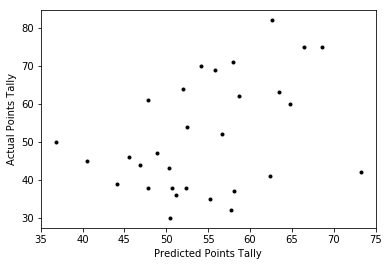

In [25]:
%matplotlib inline
plt.plot(y_pred, y_true, 'k.')
plt.xlabel("Predicted Points Tally")
plt.ylabel("Actual Points Tally")

In [26]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [27]:
#compute various error metrics to get a sense of performance
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

In [28]:

print ('Mean Absolute Error: %d' %(mae))
print ('Mean Squared Error: %d' %(mse))

Mean Absolute Error: 11
Mean Squared Error: 193


In [29]:
#test how a "dummy regressor"(one that always predicts the mean of the data) does
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
evs = explained_variance_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print ('Mean Absolute Error: %d' %(mae))
print ('Mean Squared Error: %d' %(mse))

Mean Absolute Error: 12
Mean Squared Error: 212


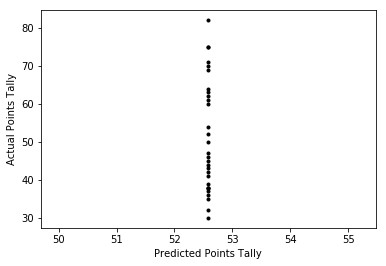

In [30]:
#check to make sure dummy regressor did what was expected(guess the same value every time)
%matplotlib inline
plt.plot(y_pred, y_true, 'k.')
plt.xlabel("Predicted Points Tally")
plt.ylabel("Actual Points Tally")

In [36]:
#load new, never seen before dataset, do grid search and then compute errors
df6 = pd.read_csv('team_attributes_processed-2015-2016-raw_data.csv')
X_new = df6.iloc[:, 3:-1]
y_new = df6['Score']
grid.fit(X, y)
y_true, y_pred = y_new, grid.predict(X_new)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
print ('Mean Absolute Error: %d' %(mae))
print ('Mean Squared Error: %d' %(mse))

Mean Absolute Error: 12
Mean Squared Error: 220


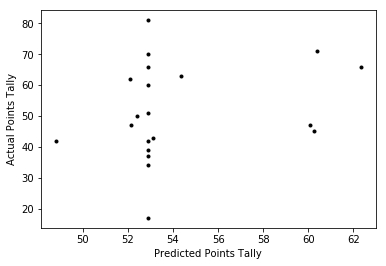

In [37]:
%matplotlib inline
plt.plot(y_pred, y_true, 'k.')
plt.xlabel("Predicted Points Tally")
plt.ylabel("Actual Points Tally")

In [38]:
print (y_pred)
print (y_true)

[ 52.8764  60.3984  52.8764  62.3224  52.8764  54.3324  52.0856  52.8764
  52.8764  52.406   52.1324  60.0784  60.2564  53.1064  48.812   52.8764
  52.8764  52.8764  52.8764  52.8764]
0     81
1     71
2     70
3     66
4     66
5     63
6     62
7     60
8     51
9     50
10    47
11    47
12    45
13    43
14    42
15    42
16    39
17    37
18    34
19    17
Name: Score, dtype: int64
